# Algerian Forest Fires Dataset

**Life Cycle of Machine Learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. 122 instances for each region.
* If user can analyze the dataset based on input features.
* Prediction of Temperature using Linear Regression

## 2) Data Collection.
* The Dataset is collected from UCI Machine Learning Repository.
* The data consists of 12 Attributes and 244 Instances.

### 2.1 Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Importing the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('D:\data_fsds\Dataset\Algerian_forest_fires_dataset.csv', header = 1)

**Show Top 125 Records**

In [3]:
df.shape

(246, 14)

In [4]:
df.head(125)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


**Droping row 122 and 123 as it has only region name and headers same as first row**

In [5]:
df.drop([122,123], axis=0, inplace=True)
df.reset_index(drop= True,inplace=True)

In [6]:
df.shape

(244, 14)

In [7]:
df.head(125)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


**Adding Region Column**

In [8]:
df.loc[0:122,'Region'] = "Bejaia"
df.loc[122:,'Region'] = "Sidi-Bel Abbes"

In [9]:
df.head(125)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,Bejaia
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi-Bel Abbes
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi-Bel Abbes


**Shape of the Dataset**

In [10]:
df.shape

(244, 15)

**Checking for Dtypes**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


**Summary of the Dataset**

In [12]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,Bejaia
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


**Checking for the Nulls in the DataFrame**

In [13]:
pd.isnull(df).sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

**Columns in the DataFrame**

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

**Removing Spaces from the Column Names**

In [15]:
[x for x in df.columns if x.endswith(' ') or x.startswith(' ')]
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


# 3) Exploring Data

**Checking unique values for all attributes**

In [17]:
df['month'].unique(), df['day'].unique(), df['year'].unique()

(array(['06', '07', '08', '09'], dtype=object),
 array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
        '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object),
 array(['2012'], dtype=object))

In [18]:
df['Temperature'].unique(), df['RH'].unique(), df['Ws'].unique(), df['Rain'].unique()

(array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
        '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object),
 array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
        '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
        '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
        '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87',
        '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35',
        '39', '31', '21', '40', '24', '38', '26'], dtype=object),
 array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
        '26', '11', '10', '9', '8', '6', '29'], dtype=object),
 array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
        '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
        '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '4', '2', '4.7',
        '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1

In [19]:
df['FFMC'].unique(), df['DMC'].unique(), df['DC'].unique()

(array(['65.7', '64.4', '47.1', '28.6', '64.8', '82.6', '88.2', '86.6',
        '52.9', '73.2', '84.5', '84', '50', '59', '49.4', '36.1', '37.3',
        '56.9', '79.9', '59.8', '81', '79.1', '81.4', '85.9', '86.7',
        '86.8', '89', '89.1', '88.7', '59.9', '55.7', '63.1', '80.1', '87',
        '80', '85.6', '66.6', '81.1', '75.1', '81.8', '73.9', '60.7',
        '72.6', '82.8', '85.4', '88.1', '73.4', '68.2', '70', '84.3',
        '89.2', '90.3', '86.5', '87.2', '78.8', '78', '76.6', '85', '86.4',
        '77.1', '87.4', '88.9', '81.3', '82.4', '80.2', '89.3', '89.4',
        '88.3', '88.6', '89.5', '85.8', '84.9', '90.1', '72.7', '52.5',
        '46', '30.5', '42.6', '68.4', '80.8', '75.8', '69.6', '62', '56.1',
        '58.5', '71', '40.9', '47.4', '44.9', '78.1', '87.7', '83.8',
        '87.8', '77.8', '73.7', '68.3', '48.6', '82', '85.7', '77.5', '45',
        '57.1', '48.7', '79.4', '83.7', '71.4', '90.6', '72.3', '53.4',
        '66.8', '62.2', '65.5', '64.6', '60.2', '86.2'

In [20]:
df['ISI'].unique(), df['BUI'].unique(), df['FWI'].unique(), df['Classes'].unique(), df['Region'].unique()

(array(['1.3', '1', '0.3', '0', '1.2', '3.1', '6.4', '5.6', '0.4', '4',
        '4.8', '0.5', '0.7', '2.5', '0.9', '2.6', '2.4', '3.3', '5.7',
        '6.7', '9.2', '7.6', '2.2', '7.2', '1.1', '0.8', '2.7', '2.8', '6',
        '1.5', '3', '1.4', '3.2', '4.6', '7.7', '5.2', '1.8', '10', '8.7',
        '4.7', '6.8', '2', '1.7', '5.5', '6.9', '7.4', '7.1', '5.9', '3.7',
        '9.7', '8.8', '9.9', '10.4', '9', '8.2', '4.4', '7.3', '12.5',
        '0.6', '0.2', '0.1', '2.1', '1.9', '6.2', '7.8', '4.5', '5.4',
        '8.4', '13.4', '5', '1.6', '4.9', '7', '8', '11.7', '11.3', '4.3',
        '4.1', '8.3', '4.2', '10.9', '9.5', '18.5', '13.2', '13.8', '17.2',
        '15.7', '19', '9.6', '16.6', '15.5', '7.5', '10.8', '3.5', '16',
        '3.8', '5.1', '11.5', '12.2', '14.3', '13.1', '8.1', '9.8', '9.1',
        '14.2', '11.2'], dtype=object),
 array(['3.4', '3.9', '2.7', '1.7', '7', '10.9', '13.5', '10.5', '12.6',
        '15.8', '17.7', '6.7', '4.4', '3', '2.2', '1.6', '2.4', '5.3',
     

In [21]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

**Removing Spaces from the attribute Values**

In [22]:
df['Classes'] = df['Classes'].str.strip()

In [23]:
df['FWI'] = df['FWI'].str.strip()

In [24]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

In [25]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [26]:
df[df['FWI'] == 'fire']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [27]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [28]:
df.drop(165, axis = 0, inplace  = True)

In [29]:
df.shape

(243, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    object
dtypes: object(15)
memory usage: 30.4+ KB


**Changing Data Type**

In [31]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['Temperature'] = df['Temperature'].astype(float)
df['RH'] = df['RH'].astype(float)
df['Ws'] = df['Ws'].astype(float)
df['Rain'] = df['Rain'].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)
df['Classes'] = df['Classes'].astype(str)
df['Region'] = df['Region'].astype(str)

**Rechecking Data Type**

In [32]:
df.dtypes

day              int32
month            int32
year             int32
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

**Categorical And Numerical Features**

In [33]:
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
Numerical_features = [features for features in df.columns if df[features].dtype!= 'O']
print('There are total {} categorical features and they are following : {}'.format(len(categorical_features),categorical_features))
print('\nThere are total {} Numerical features and they are following : {}'.format(len(Numerical_features),Numerical_features))

There are total 2 categorical features and they are following : ['Classes', 'Region']

There are total 13 Numerical features and they are following : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [34]:
df.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,Bejaia
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,122
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,NaN
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,NaN
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,NaN


In [35]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
Region           2
dtype: int64

**Checking for Null Values**

In [36]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [37]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


**Transforming Classes and Region Values to 0's and 1's**

In [38]:
#Labelencoder can be used to transform values as shown below but will not be using it as its using 1 for Non-Fire and 0 for fire
from sklearn.preprocessing import LabelEncoder
classes_encoder = LabelEncoder()
classes_values = classes_encoder.fit_transform(df['Classes'])

print("Before Encoding:", list(df['Classes'][:2]))
print("After Encoding:", classes_values[:2])
df['Classes'] = classes_values

Before Encoding: ['not fire', 'not fire']
After Encoding: [1 1]


In [39]:
#using below method for transforming values

In [40]:
df['Classes'] = df['Classes'].replace(('not fire','fire'),(0,1))

In [41]:
df['Classes'].unique()

array([1, 0])

In [42]:
df['Region'] = df['Region'].replace(('Sidi-Bel Abbes','Bejaia'),(1,0))

In [43]:
df['Region'].unique()

array([0, 1], dtype=int64)

In [44]:
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
Numerical_features = [features for features in df.columns if df[features].dtype!= 'O']
print('There are total {} categorical features and they are following : {}'.format(len(categorical_features),categorical_features))
print('\nThere are total {} Numerical features and they are following : {}'.format(len(Numerical_features),Numerical_features))

There are total 0 categorical features and they are following : []

There are total 15 Numerical features and they are following : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


# Checking for Outliers

**Relationship Ananlysis**

In [45]:
correlation = df.corr()
correlation

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734


<AxesSubplot:>

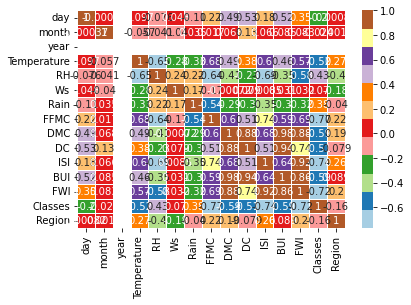

In [46]:
sns.heatmap(df.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, cmap = "Paired",xticklabels="auto", yticklabels="auto")

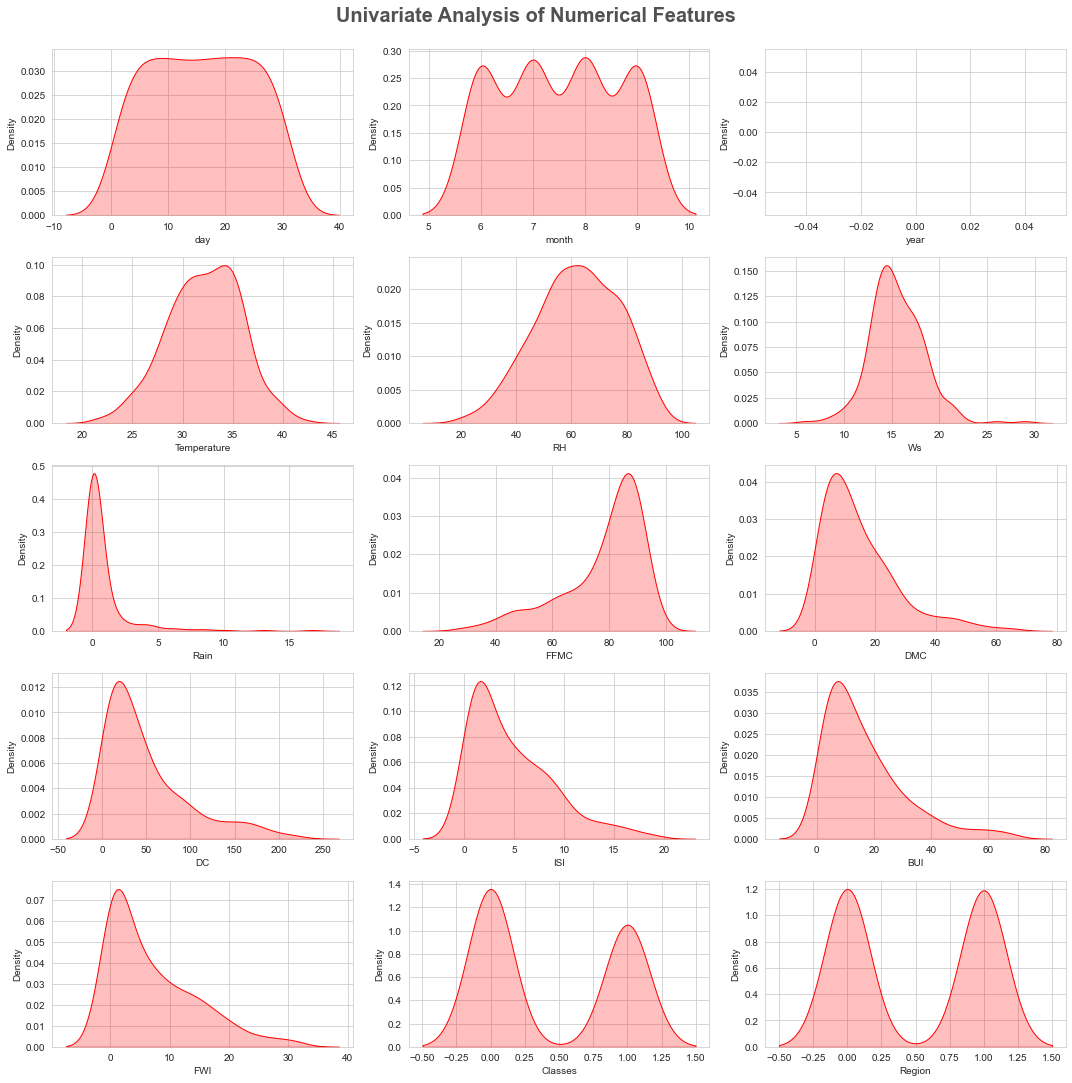

In [222]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(Numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[Numerical_features[i]],shade=True, color='r')
    plt.xlabel(Numerical_features[i])
    plt.tight_layout()

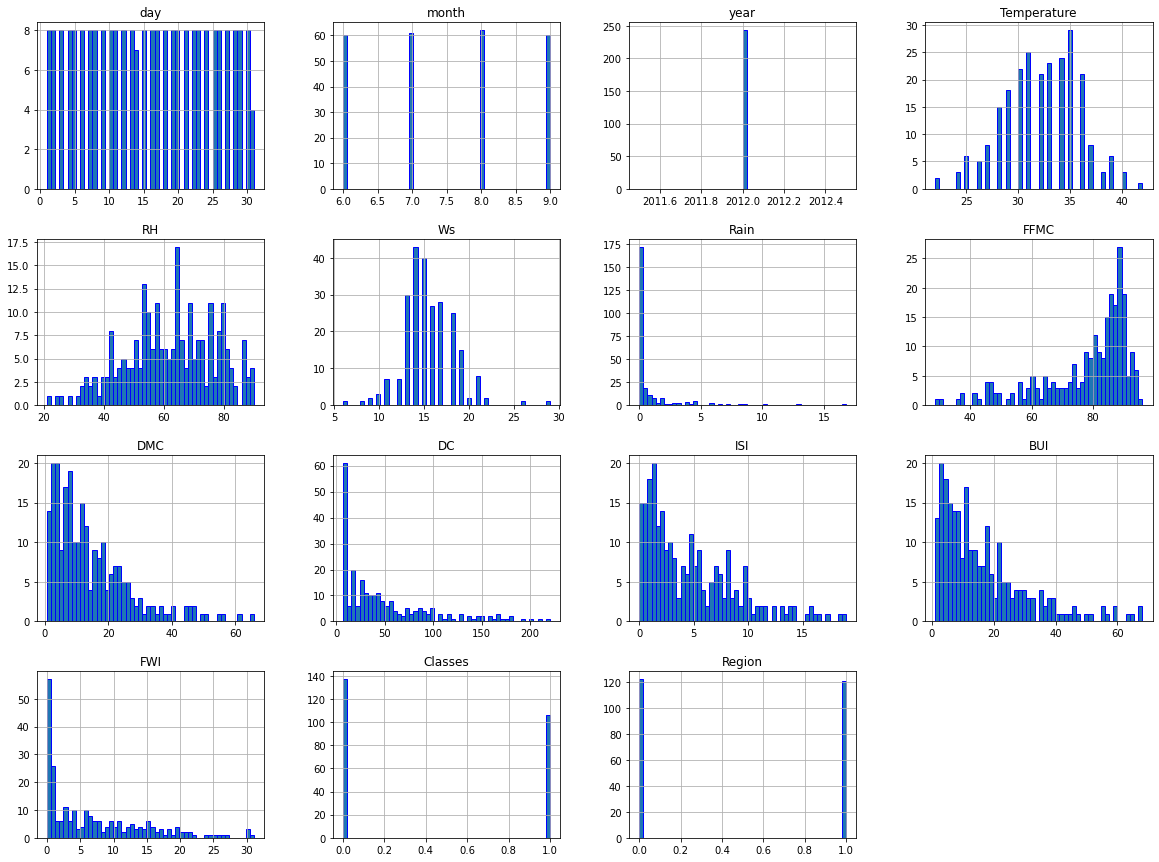

In [47]:
# Plotting density plot for all features
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

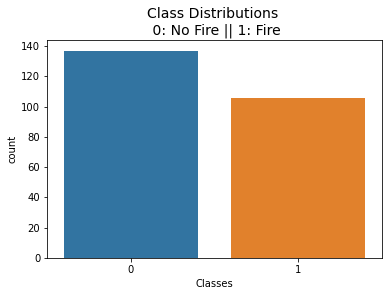

In [48]:
sns.countplot('Classes', data=df, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=14)

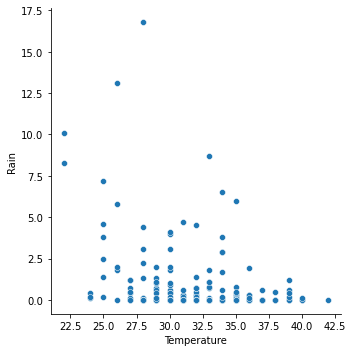

In [49]:
sns.relplot(x = 'Temperature', y = 'Rain', data = df)

In [223]:
#Observation - we can observe from the above graph that more the temperature less is the rain.maximum rain occured at 27.5 to 30.0 temperature

<AxesSubplot:ylabel='FFMC'>

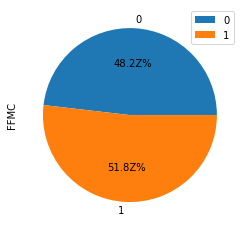

In [50]:
# Graph A
#1 - Sidi-Bel Abbes and 0 - Bejaia Region
df.groupby(['Region']).sum().plot(kind='pie', y='FFMC',autopct = '%1.1fZ%%')

In [ ]:
# Observation - FFMC Percentage is more in Sidi-Bel Abbe Region

<AxesSubplot:ylabel='Temperature'>

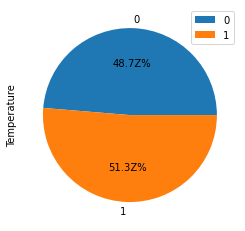

In [51]:
#Graph B
df.groupby(['Region']).sum().plot(kind='pie', y='Temperature',autopct = '%1.1fZ%%')

In [52]:
# Observation - Temperature Percentage is more in Sidi-Bel Abbe Region

**Monthly Distribution of Fire Data**

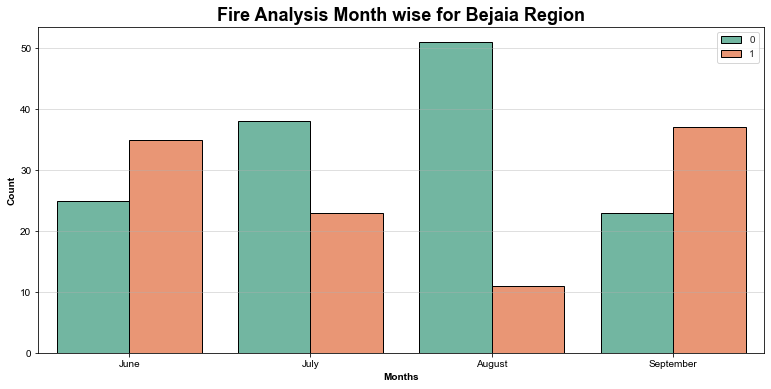

In [53]:
dftemp= df.loc[df['Region']== 0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

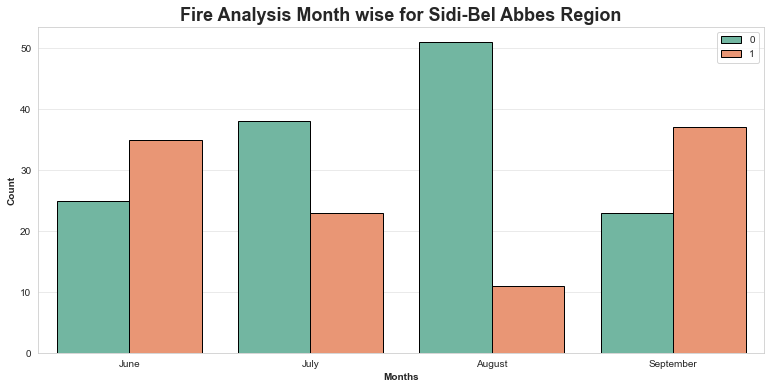

In [54]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [55]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

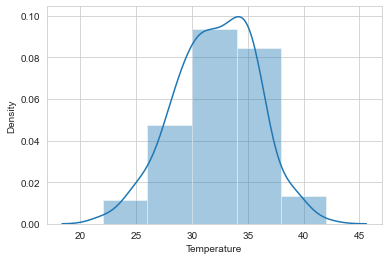

In [56]:
sns.distplot(df['Temperature'],bins= 5)

<AxesSubplot:xlabel='Rain', ylabel='Density'>

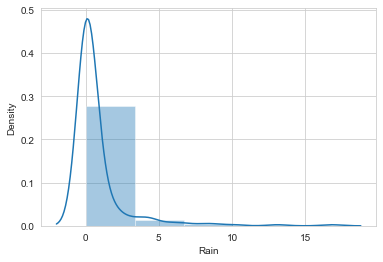

In [57]:
sns.distplot(df['Rain'],bins= 5)

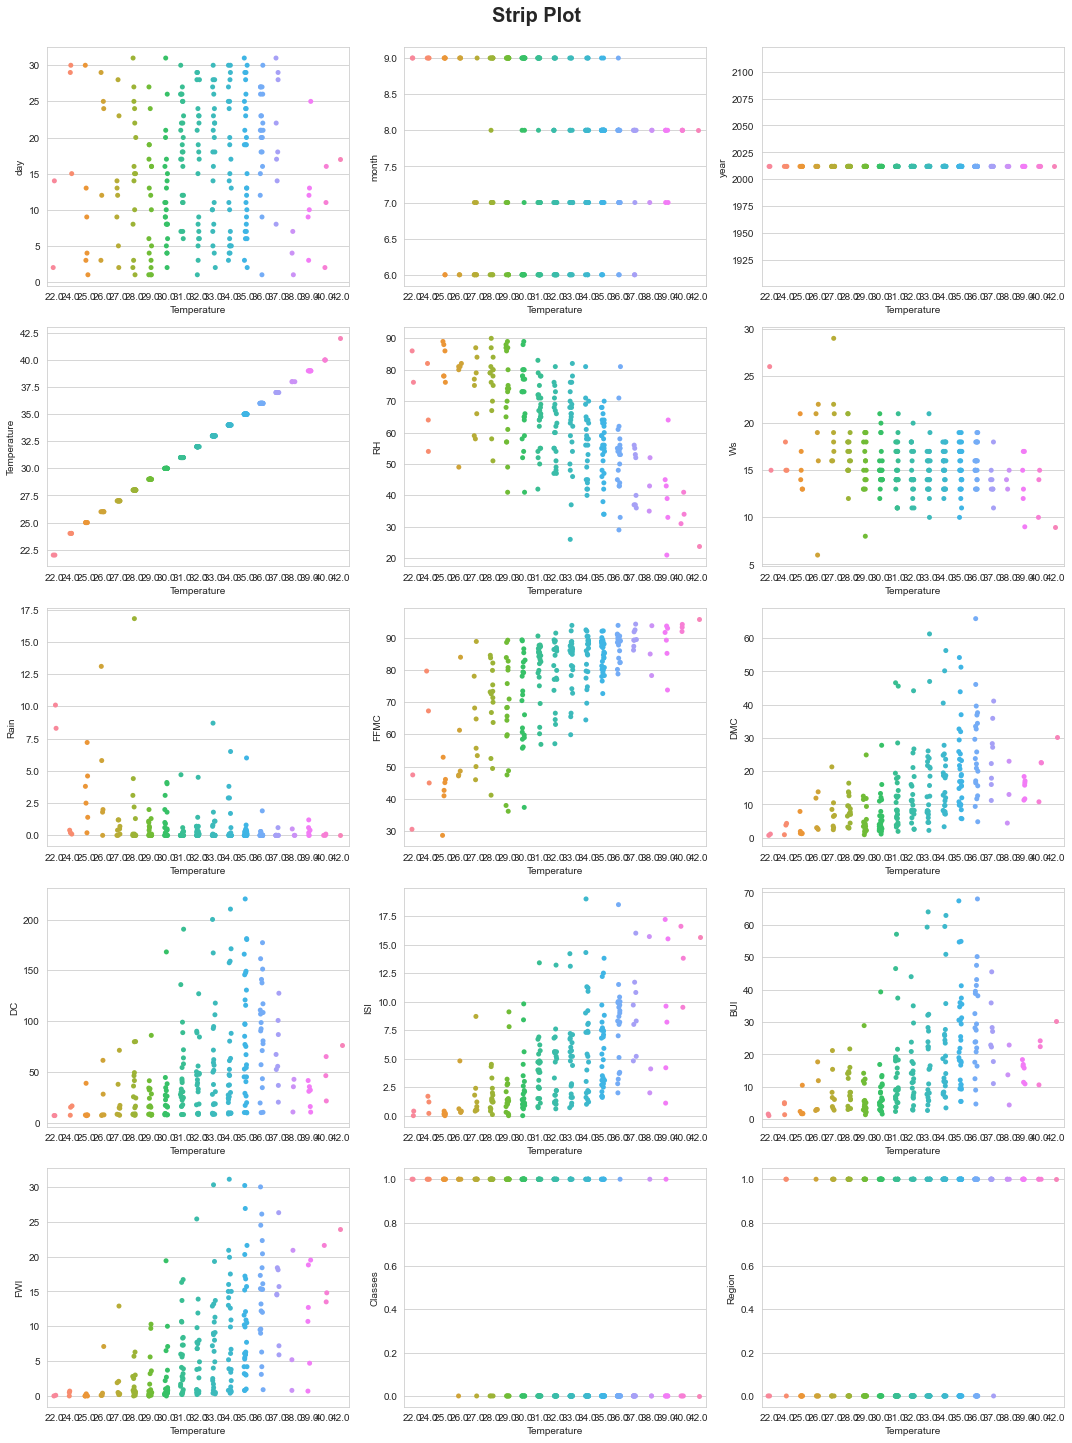

In [224]:
# strip plot to see the relationship between numerical features and target
## Targeted Feature is "Temperature"


plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(Numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=Numerical_features[i], x='Temperature', data=df)
    plt.tight_layout()

In [ ]:
Observation: - 
#Targeted Feature is "Temperature"

#places with higher 'RH' has Lower 'Temperature'
#places with lower 'WS' has higher 'Temperature'
#places with FFMC > 80 has higher 'Temperature'
#places with ISI > 15.0 has higher 'Temperature'

In [59]:
import cufflinks as cf 
import numpy as np
import pandas as pd 
import seaborn as sns
cf.go_offline()

<AxesSubplot:>

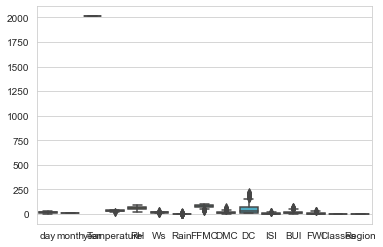

In [228]:
sns.boxplot(data = df,orient="v")

In [229]:
#Observation:- RH, Rain, FFMC, DMC BUI has many outliers

In [61]:
df['Temperature'].corr(df['Rain'])

-0.3264919235683727

In [62]:
df.iplot(x = 'month', y = 'Rain', kind = 'bar')

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

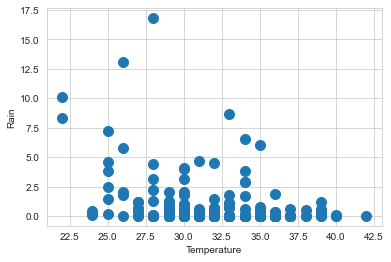

In [63]:
df.plot.scatter(x = 'Temperature', y = 'Rain', s = 100) # s is size of dots

In [64]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


<AxesSubplot:xlabel='FFMC'>

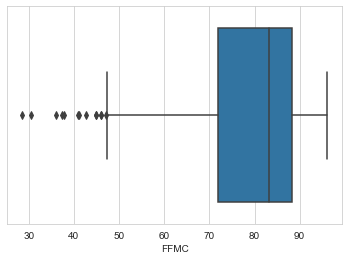

In [66]:
sns.boxplot(df['FFMC'])

<AxesSubplot:xlabel='Rain'>

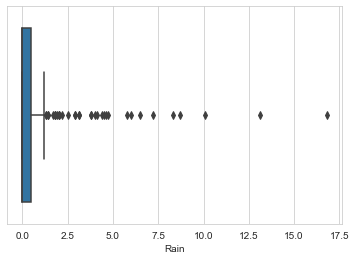

In [67]:
sns.boxplot(df['Rain'])

<AxesSubplot:xlabel='DMC'>

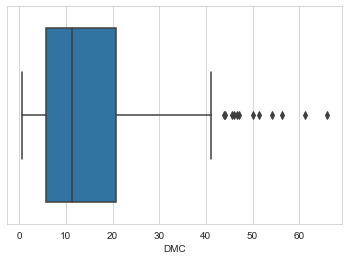

In [68]:
sns.boxplot(df['DMC'])

In [69]:
##Observation - other than Temperature all other features like FFMC, DMC and Rain have outliers 

In [70]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [83]:
##Independent and Dependent Features
x = df.copy()
x.drop(['Temperature'],axis=1, inplace = True)
x

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,27,9,2012,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,2012,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,2012,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [82]:
y = df['Temperature'].copy()
y

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
239    30.0
240    28.0
241    27.0
242    24.0
243    24.0
Name: Temperature, Length: 243, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=20)

In [192]:
X_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
205,23,8,2012,43.0,16.0,0.0,91.2,46.1,137.7,11.5,50.2,24.5,0,1
159,8,7,2012,47.0,18.0,6.0,80.8,9.8,9.7,3.1,9.4,3.0,0,1
76,16,8,2012,61.0,18.0,0.3,80.2,11.7,90.4,2.8,17.6,4.2,0,0
67,7,8,2012,69.0,16.0,0.0,86.5,15.5,48.6,5.5,17.2,8.0,0,0
31,2,7,2012,75.0,19.0,1.2,55.7,2.4,8.3,0.8,2.8,0.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,5,7,2012,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,0,1
224,11,9,2012,73.0,14.0,0.0,79.2,6.5,16.6,2.1,6.6,1.2,1,1
15,16,6,2012,89.0,13.0,0.7,36.1,1.7,7.6,0.0,2.2,0.0,1,0
219,6,9,2012,71.0,14.0,6.5,64.5,3.3,9.1,1.0,3.5,0.4,1,1


In [193]:
y_train

205    36.0
159    35.0
76     36.0
67     32.0
31     27.0
       ... 
156    34.0
224    30.0
15     29.0
219    34.0
99     30.0
Name: Temperature, Length: 162, dtype: float64

In [194]:
X_test

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
232,19,9,2012,41.0,8.0,0.1,83.9,24.9,86.0,2.7,28.9,5.6,0,1
150,29,6,2012,36.0,13.0,0.6,86.2,17.9,36.7,4.8,17.8,7.2,0,1
66,6,8,2012,75.0,14.0,0.0,86.4,13.0,39.1,5.2,14.2,6.8,0,0
128,7,6,2012,44.0,17.0,0.2,85.6,9.9,28.9,5.4,10.7,6.0,0,1
106,15,9,2012,82.0,15.0,0.4,44.9,0.9,7.3,0.2,1.4,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,7,8,2012,63.0,13.0,2.9,69.7,7.2,9.8,1.2,6.9,0.6,1,1
140,19,6,2012,67.0,14.0,4.5,64.6,4.4,8.2,1.0,4.2,0.4,1,1
227,14,9,2012,81.0,15.0,0.0,84.6,12.6,41.5,4.3,14.3,5.7,0,1
216,3,9,2012,75.0,16.0,0.0,82.2,4.4,24.3,3.3,6.0,2.5,0,1


In [195]:
y_test

232    29.0
150    37.0
66     32.0
128    35.0
106    24.0
       ... 
189    34.0
140    32.0
227    28.0
216    28.0
39     33.0
Name: Temperature, Length: 81, dtype: float64

In [196]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((162, 14), (81, 14), (162,), (81,))

In [197]:
##Standardize or feature scalaing the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [198]:
X_train = scaler.fit_transform(X_train)

In [199]:
X_test = scaler.transform(X_test) # to avoid data leakage we have used transform instead of fit.transform for test data

In [200]:
X_train

array([[ 0.96636831,  0.49029034,  0.        , ...,  2.28258606,
        -0.8291562 ,  1.01242284],
       [-0.84837279, -0.39223227,  0.        , ..., -0.60799249,
        -0.8291562 ,  1.01242284],
       [ 0.11948913,  0.49029034,  0.        , ..., -0.44665787,
        -0.8291562 , -0.9877296 ],
       ...,
       [ 0.11948913, -1.27475488,  0.        , ..., -1.01132903,
         1.20604538, -0.9877296 ],
       [-1.09033827,  1.37281295,  0.        , ..., -0.95755083,
         1.20604538,  1.01242284],
       [-0.84837279,  1.37281295,  0.        , ..., -0.95755083,
         1.20604538, -0.9877296 ]])

In [201]:
X_test

array([[ 0.48243735,  1.37281295,  0.        , ..., -0.25843415,
        -0.8291562 ,  1.01242284],
       [ 1.69226475, -1.27475488,  0.        , ..., -0.04332133,
        -0.8291562 ,  1.01242284],
       [-1.09033827,  0.49029034,  0.        , ..., -0.09709954,
        -0.8291562 , -0.9877296 ],
       ...,
       [-0.12247635,  1.37281295,  0.        , ..., -0.2449896 ,
        -0.8291562 ,  1.01242284],
       [-1.4532865 ,  1.37281295,  0.        , ..., -0.67521525,
        -0.8291562 ,  1.01242284],
       [-0.60640731, -0.39223227,  0.        , ..., -0.94410627,
         1.20604538, -0.9877296 ]])

**Model Training**

**LINEAR REGRESSION**

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
regression = LinearRegression()

In [204]:
regression

LinearRegression()

In [205]:
#training the data with linear regression,fit is used to train the data i.e. finding parameters and transform is used for tranforming the data
regression.fit(X_train,y_train)  #X_train is independent feature ,y_train is dependent feature

LinearRegression()

In [206]:
##Printing the Coefficients and intercepts
print(regression.coef_)

[-5.22278003e-01 -3.38826650e-01  2.22044605e-16 -1.24410993e+00
 -6.13817431e-01 -9.29151993e-02  9.95406796e-01 -2.06659331e-01
  9.69177487e-01 -3.06618960e-01 -4.12014611e-01  7.21947480e-01
 -3.55886245e-01  9.09537486e-02]


In [207]:
print(regression.intercept_) # intercept here means if value of all the independent dataset is 0 then price will be 22

32.160493827160494


In [208]:
#Prediction for Test data
reg_pred = regression.predict(X_test)
reg_pred

array([35.93846253, 34.96870808, 32.4199463 , 34.75940018, 26.76429142,
       29.65844002, 31.10037825, 33.62394742, 31.00789869, 35.24784595,
       33.49630877, 27.67032367, 31.11847269, 33.98946486, 31.3209501 ,
       28.81681315, 32.55125204, 34.57422181, 32.53814199, 29.12844888,
       36.50238324, 31.44757069, 33.23845464, 32.89871478, 24.14347756,
       33.43881679, 30.79042594, 36.28198515, 22.38253016, 33.33775488,
       32.96494563, 34.4504167 , 27.38094557, 31.83687228, 30.18237957,
       33.63153637, 33.12573933, 30.73564998, 31.82645956, 33.6236523 ,
       30.46960824, 35.86704977, 32.09996472, 30.94945532, 31.79692071,
       31.61648565, 31.8207043 , 27.64541429, 32.89398385, 29.69823959,
       25.08859934, 32.11284518, 24.68499081, 29.42983656, 35.28482963,
       32.09366588, 31.30700827, 32.53383555, 24.64140168, 34.30963686,
       31.95186044, 29.04300653, 33.38597646, 33.83866119, 32.06827376,
       32.57694448, 32.83354056, 28.16347679, 35.82203333, 31.01

In [209]:
###Assumptions of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

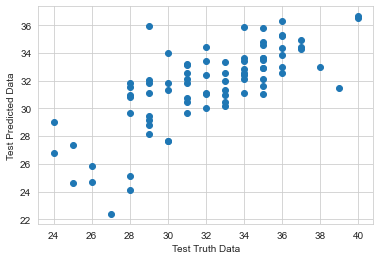

In [210]:
# first Assumption - w.r.t test and predicted Data plot should be linearly distributed

plt.scatter(y_test,reg_pred) #scatter plot should be in a linear manner i.e when x is increasing y is also increasing
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [211]:
# second assump - on plotting residuals curve should be approxiamte normal distribution
#residuals
residuals = y_test - reg_pred

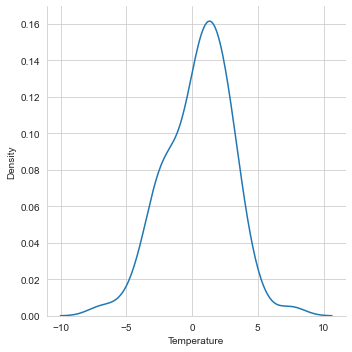

In [212]:
sns.displot(residuals,kind="kde") # righthand side outliers are there

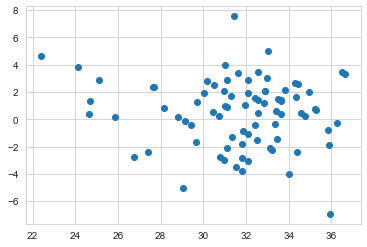

In [213]:
#third Assumption - uniform distribution - data is uniformally distributed
##Scatter plot with predictions and residuals
plt.scatter(reg_pred,residuals)

In [214]:
##Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.332982203352664
2.051321750672629
2.5165417150034814


**R Square and Adjusted R Square**

In [215]:
#R square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5212612195110514


In [217]:
#Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4197105691043048